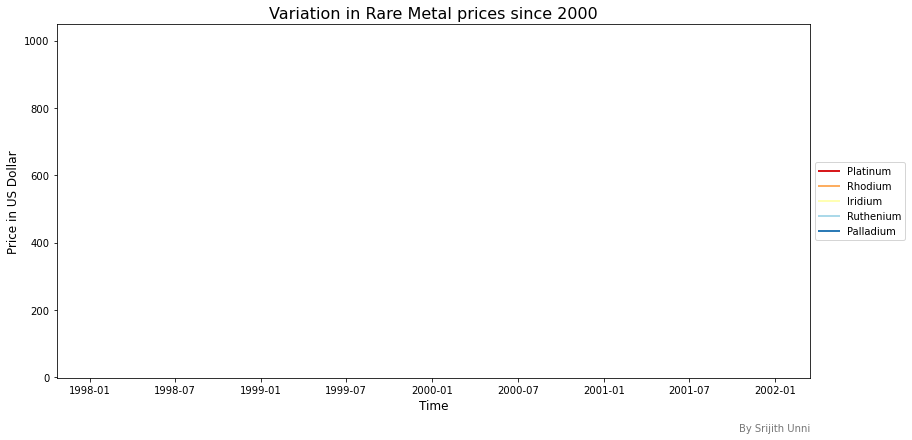

In [4]:
#plotting the actual animation
import quandl as qd
import datetime as dt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os.path

#path = 'C:\Users\Srijith'

qd.ApiConfig.api_key = 'ENTER API KEY HERE' #subscribe to Quandl.com and add user-specific API key here

matplotlib.rcParams['animation.embed_limit'] = 200**128

#date set
today = dt.date.today()
#delta = dt.timedelta(days = 712)
date = '01/01/2000'
startdate = dt.datetime.strptime(date,"%d/%m/%Y")

#sample period set
#start_of_sample = (today - delta)
start_of_sample = startdate
end_of_sample = today

#convert format of date
start_of_sample = start_of_sample.isoformat()
end_of_sample = end_of_sample.isoformat()

#DATA WRANGLING
#empty pd df using sample with freq B which is Business days
Data = pd.DataFrame(index = pd.date_range(start = start_of_sample , end = end_of_sample , freq = 'B'))

#get data from API call
platinum_data = qd.get('JOHNMATT/PLAT', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
rhodium_data = qd.get('JOHNMATT/RHOD', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
iridium_data = qd.get('JOHNMATT/IRID', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
ruthenium_data = qd.get('JOHNMATT/RUTH', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
palladium_data = qd.get('JOHNMATT/PALL', start_date = start_of_sample , end_date = end_of_sample, paginate = True)

#concat prices from both metals with respect to London time and rename columns
Data = pd.concat([Data , platinum_data['London 09:00'] , rhodium_data['London 09:00'], iridium_data['London 09:00'], ruthenium_data['London 09:00'], palladium_data['London 09:00']], axis = 1)
Data.columns = ['Platinum_Data' , 'Rhodium_Data','Iridium_Data','Ruthenium_Data','Palladium_Data']

#Remove na values
Data = Data.dropna(axis = 0 , how = 'any')

#Data.to_csv('Check_Data.csv') #saving external copy
#print(end_of_sample)

#ANIMATION OF GRAPH
#set figure, subplot and axes of the graph
fig = plt.figure(figsize = (13.5,6.5))
ax1 = fig.add_subplot(1,1,1)
#set limits
ax1.axis(xmin = Data.index[0], xmax = Data.index[-1])
#max determined by highest priced metal and min determined by lowest priced metal
ax1.axis(ymin = Data['Ruthenium_Data'].min()-265, ymax = Data['Rhodium_Data'].max()+1000) 

#define animate function
def animate(i):
    dat = Data.iloc[:int(i+1)] #select date range
    #initialize as empty list
    xp = []
    y1p = []
    y2p = []
    y3p = []
    y4p = []
    y5p = []
    
    lines = dat
    
    for line in lines:
        #assign dat values to list
        xp = dat.index
        y1p = dat['Platinum_Data']
        y2p = dat['Rhodium_Data']
        y3p = dat['Iridium_Data']
        y4p = dat['Ruthenium_Data']
        y5p = dat['Palladium_Data']
        
        ax1.clear()
        
        #add textbox with artist details
        ax1.text(1, -0.15, 'By Srijith Unni', transform = ax1.transAxes, color = '#777777', ha = 'right', bbox = dict(facecolor = 'white', alpha = 0.1, edgecolor = 'white'))
        
        #plot Platinum and Rhodium data
        ax1.plot(xp, y1p, color = '#d7191c', linewidth = 2, label = 'Platinum')
        ax1.plot(xp, y2p, color = '#fdae61', linewidth = 2, label = 'Rhodium')
        ax1.plot(xp, y3p, color = '#ffffb3', linewidth = 2, label = 'Iridium')
        ax1.plot(xp, y4p, color = '#abd9e9', linewidth = 2, label = 'Ruthenium')
        ax1.plot(xp, y5p, color = '#2c7bb6', linewidth = 2, label = 'Palladium')
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        #add label for both axes and title for the graph
        plt.xlabel('Time', fontsize = 12)
        plt.ylabel('Price in US Dollar', fontsize = 12)
        plt.title("Variation in Rare Metal prices since 2000", fontsize = 16)
        
#call FuncAnimation in Matplotlib
ani = animation.FuncAnimation(fig, animate, frames = len(Data), interval = 80)

#define the writer
Writer = animation.writers['ffmpeg']

#set fps and bitrate
writer = Writer(fps = 20, metadata = dict(artist = 'Srijith Unni'), bitrate = 1800)

#save to output file
ani.save('Full Data animation video.mp4', writer = writer)

#Html5 inline display
#HTML(ani.to_html5_video())

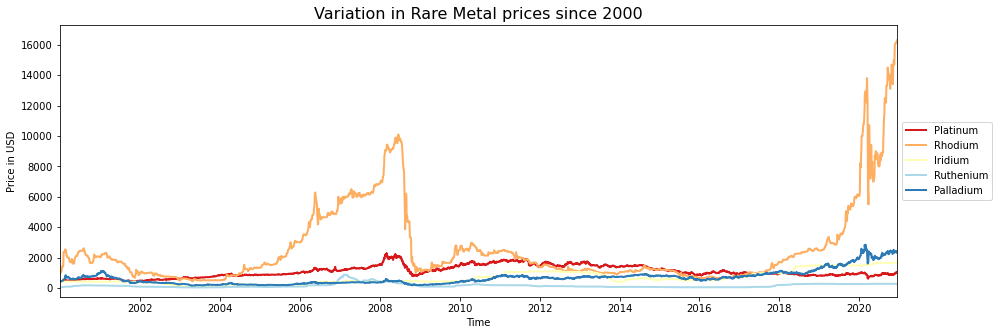

In [3]:
#Plotting a static graph for the report
import quandl as qd
import datetime as dt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os.path

#path = 'C:\Users\Srijith'

qd.ApiConfig.api_key = "FJNfhvbRyc68YWmxZAqc" 

matplotlib.rcParams['animation.embed_limit'] = 200**128

#date set
today = dt.date.today()
#delta = dt.timedelta(days = 712)
date = '01/01/2000'
startdate = dt.datetime.strptime(date,"%d/%m/%Y")

#sample period set
#start_of_sample = (today - delta)
start_of_sample = startdate
end_of_sample = today

#convert format of date
start_of_sample = start_of_sample.isoformat()
end_of_sample = end_of_sample.isoformat()

#DATA WRANGLING
#empty pd df using sample with freq B which is Business days
Data = pd.DataFrame(index = pd.date_range(start = start_of_sample , end = end_of_sample , freq = 'B'))

#get data from API call
platinum_data = qd.get('JOHNMATT/PLAT', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
rhodium_data = qd.get('JOHNMATT/RHOD', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
iridium_data = qd.get('JOHNMATT/IRID', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
ruthenium_data = qd.get('JOHNMATT/RUTH', start_date = start_of_sample , end_date = end_of_sample, paginate = True)
palladium_data = qd.get('JOHNMATT/PALL', start_date = start_of_sample , end_date = end_of_sample, paginate = True)

#concat prices from both metals with respect to London time and rename columns
Data = pd.concat([Data , platinum_data['London 09:00'] , rhodium_data['London 09:00'], iridium_data['London 09:00'], ruthenium_data['London 09:00'], palladium_data['London 09:00']], axis = 1)
Data.columns = ['Platinum_Data' , 'Rhodium_Data','Iridium_Data','Ruthenium_Data','Palladium_Data']

#Remove na values
Data = Data.dropna(axis = 0 , how = 'any')

#Data.to_csv('Check_Data.csv') #saving external copy
#print(end_of_sample)

#PLOTTING STATIC GRAPH
#setting matplotlib inline
%matplotlib inline
plt.style.use("seaborn-colorblind")

#set size
fig = plt.figure(figsize = (15,5))

#add limits in x-axis and y-axis
plt.xlim(Data.index[0] , Data.index[-1])
plt.ylim((Data['Platinum_Data'].min()-1000) , (Data['Rhodium_Data'].max()+1000))

#plot Platinum in dashed red line, width 2 and Rhodium in solid blue line, width 2
plt.plot(Data['Platinum_Data'], data = Data, marker = '', color = '#d7191c', linewidth = 2, label = 'Platinum')
plt.plot(Data['Rhodium_Data'], data = Data, marker = '', color = '#fdae61', linewidth = 2, label = 'Rhodium')
plt.plot(Data['Iridium_Data'], data = Data, marker = '', color = '#ffffb3', linewidth = 2, label = 'Iridium')
plt.plot(Data['Ruthenium_Data'], data = Data, marker = '', color = '#abd9e9', linewidth = 2, label = 'Ruthenium')
plt.plot(Data['Palladium_Data'], data = Data, marker = '', color = '#2c7bb6', linewidth = 2, label = 'Palladium')

#plot title
plt.title('Variation in Rare Metal prices since 2000', fontsize = 16)

#set x-axis and y-axis label
plt.xlabel('Time', fontsize = 10)
plt.ylabel('Price in USD', fontsize = 10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#save output to output directory
plt.savefig('Variation since 2000.png')

#show plot
plt.show();
